# Homework 4: Data Visualization
- **Name**:  Fathima Sharsoom
- **UB Username**: fsharsoo
- **UB Person Number**: 50542224

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [28]:
#imported matplot and pandas
import matplotlib.pyplot as plt
import pandas as pd

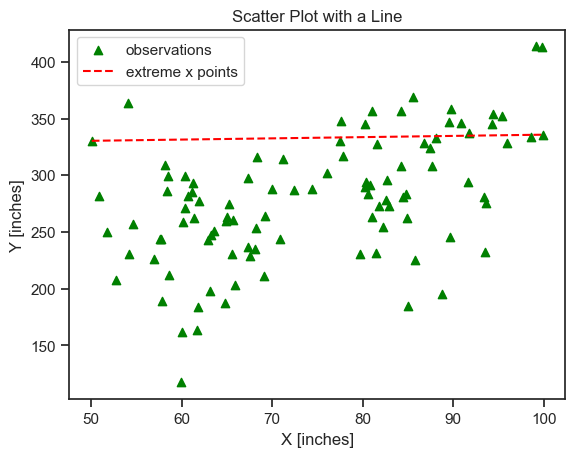

In [29]:
#set the data to d0
d0 = pd.read_csv("scatter_data.csv", comment="%", delimiter="\t", header=None)

#to split and assign x and y as the column names
d0 = d0[0].str.split(',', expand=True)
d0.columns = ["x", "y"]

#converting x and y to numeric data
d0["x"] = pd.to_numeric(d0["x"])
d0["y"] = pd.to_numeric(d0["y"])

#plotting 
plt.scatter(d0["x"], d0["y"], marker="^", color="green", label="observations")
min_x = d0["x"].min()
max_x = d0["x"].max()
y_min_x = d0.loc[d0["x"] == min_x, "y"].values[0]
y_max_x = d0.loc[d0["x"] == max_x, "y"].values[0]
plt.plot([min_x, max_x], [y_min_x, y_max_x], color="red", linestyle="--", label="extreme x points")

# Set plot title and axis labels
plt.title("Scatter Plot with a Line")
plt.xlabel("X [inches]")
plt.ylabel("Y [inches]")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Problem 2 - Histogram

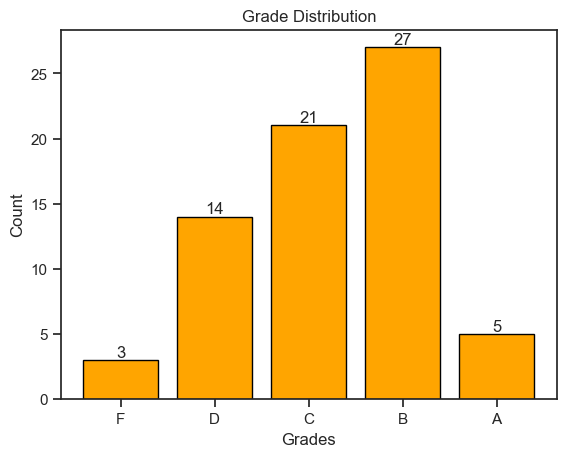

In [30]:
#import numpy
import numpy as np

#set data to d1
d1 = pd.read_csv('student_grades.csv', comment='%')

#to select second column in the dataframe
scores = d1.iloc[:, 1]

#assigning bins and grades
bins = [0, 60, 70, 80, 90, 100]
grades = ['F', 'D', 'C', 'B', 'A']

hist, bin_edges = np.histogram(scores, bins=bins)

#plotting
plt.bar(grades, hist, color='orange', edgecolor='black')
for i, count in enumerate(hist):
    plt.text(grades[i], count, str(count), ha='center', va='bottom')

plt.title('Grade Distribution')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

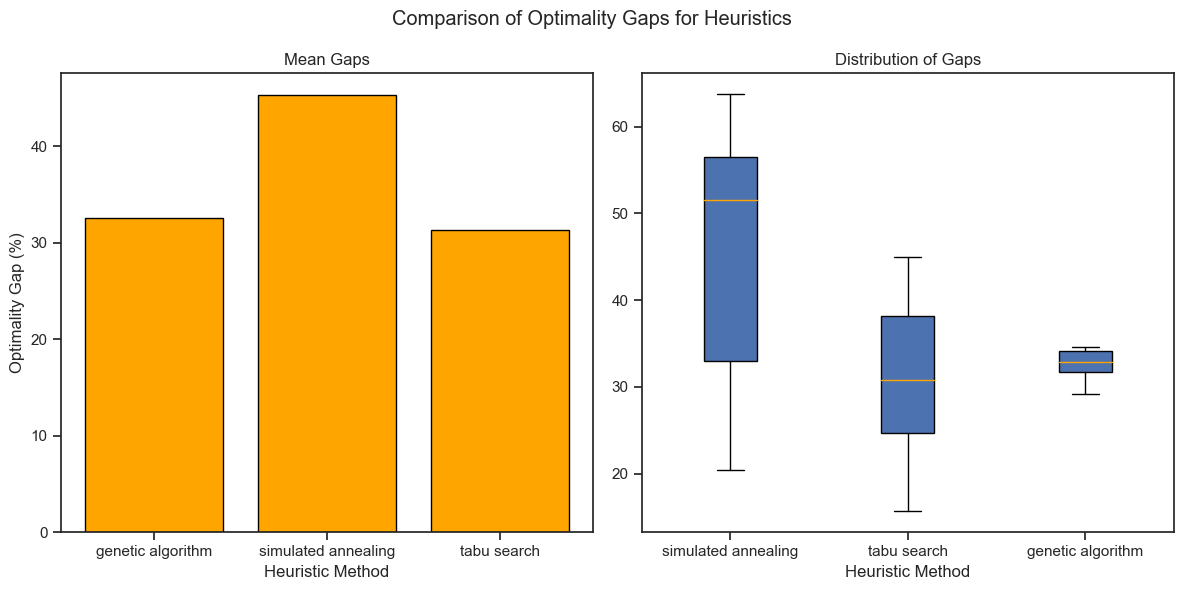

In [31]:
d2 = pd.read_csv("solution_data.csv", comment="%")
d2.columns = ["Problem", "SolnMethod", "Value"]

# Calculate optimal gaps
optimalValue = d2[d2['SolnMethod'] == 'optimal'].groupby('Problem')['Value'].mean()
heuristicValue = d2[d2['SolnMethod'] != 'optimal'].groupby(['Problem', 'SolnMethod'])['Value'].mean()
Gaps = (optimalValue - heuristicValue) / optimalValue * 100

# Reset the index
Gaps = Gaps.reset_index()

# Create dataframe
barplot_data = pd.DataFrame({
    'Heuristic': Gaps['SolnMethod'],
    'Optimality Gap': Gaps['Value']
})

Gaps = Gaps.reset_index()
average_gaps = barplot_data[barplot_data['Heuristic'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
average_gaps = average_gaps.groupby('Heuristic')['Optimality Gap'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

# First subplot
axes[0].bar(average_gaps['Heuristic'], average_gaps['Optimality Gap'], color="orange", edgecolor="black")
axes[0].set_xlabel("Heuristic Method")
axes[0].set_ylabel("Optimality Gap (%)")
axes[0].set_title("Mean Gaps")

# Second subplot
data_boxplot = [Gaps[Gaps['SolnMethod'] == method]['Value'] for method in Gaps['SolnMethod'].unique()]

# Create the boxplot
bp = axes[1].boxplot(data_boxplot, labels=Gaps['SolnMethod'].unique(), patch_artist=True, medianprops={'color': 'orange'})

# set the labels
custom_labels = Gaps['SolnMethod'].unique()
custom_positions = range(1, len(custom_labels) + 1)
axes[1].set_xticks(custom_positions)
axes[1].set_xticklabels(custom_labels, ha="center")
axes[1].set_xlabel("Heuristic Method")
axes[1].set_title("Distribution of Gaps")

#adjust layout to fit in the plot
plt.tight_layout()
plt.show()

--- 
## Part 2 - Explore New Plot Types

This breast cancer patient dataset was collected from the NCI's SEER Program's November 2017 update, which provides information on population-based cancer statistics. The provided plot represents an analysis of cancer patients' survival in terms of both age, cancer stage, and survival time in months.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/joint_kde.html
- **URL of Sample Data**:  https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

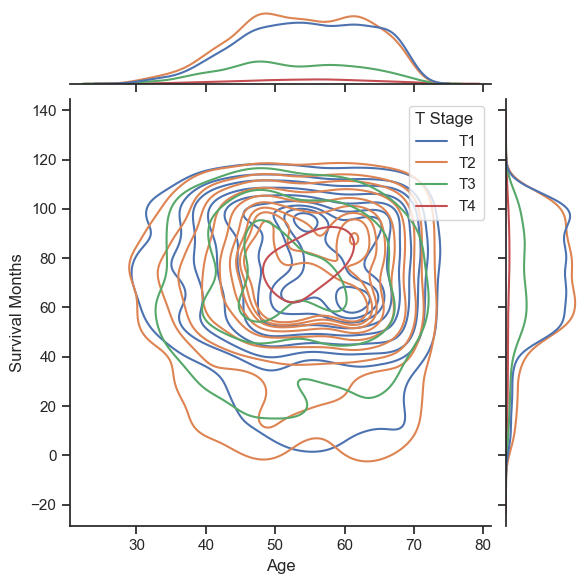

In [24]:
sns.set_theme(style="ticks")
d3 = pd.read_csv("Breast_Cancer.csv")
g = sns.jointplot(
    data=d3,
    x="Age", y="Survival Months", hue="T Stage ",kind="kde"
)

I used seaborn plot called as joint kernel density estimate, to study the analyse the density of patients suffering breast cancer reagarding their age, stage and survival month. The T stage represents the severity of the cancer. T1 is the lowest and severity increases to T4. From the plot we can analyse that most of the patients with T4 stage of cancer fall in the age group of 50-60. They are very less in number. Most of the breast cancer patients have T2 stage breast cancer and  they fall in all age category. The survival months of the patients vary according to their age and stage of the cancer.